<a href="https://colab.research.google.com/github/akumarpandey686/brain_tumor_classification/blob/master/Project_inception_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
base_dir = '/content/drive/My Drive/MTech/final_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training tumor pictures
train_cats_dir = os.path.join(train_dir, 'tumor')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'non_tumor')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'tumor')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'non_tumor')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 188 images belonging to 2 classes.
Found 75 images belonging to 2 classes.
Epoch 1/10
10/10 - 2s - loss: 0.6752 - acc: 0.5851 - val_loss: 0.6660 - val_acc: 0.6267
Epoch 2/10
10/10 - 2s - loss: 0.6602 - acc: 0.6277 - val_loss: 0.7013 - val_acc: 0.6000
Epoch 3/10
10/10 - 2s - loss: 0.6560 - acc: 0.6117 - val_loss: 0.6615 - val_acc: 0.6000
Epoch 4/10
10/10 - 2s - loss: 0.6542 - acc: 0.6170 - val_loss: 0.6226 - val_acc: 0.6400
Epoch 5/10
10/10 - 2s - loss: 0.6532 - acc: 0.6170 - val_loss: 0.6197 - val_acc: 0.6267
Epoch 6/10
10/10 - 2s - loss: 0.6292 - acc: 0.6330 - val_loss: 0.5975 - val_acc: 0.6800
Epoch 7/10
10/10 - 2s - loss: 0.6152 - acc: 0.6649 - val_loss: 0.5765 - val_acc: 0.7200
Epoch 8/10
10/10 - 2s - loss: 0.6305 - acc: 0.6489 - val_loss: 0.5712 - val_acc: 0.7333
Epoch 9/10
10/10 - 2s - loss: 0.6210 - acc: 0.6702 - val_loss: 0.6085 - val_acc: 0.6533
Epoch 10/10
10/10 - 2s - loss: 0.5921 - acc: 0.6915 - val_loss: 0.5452 - val_acc: 0.6933


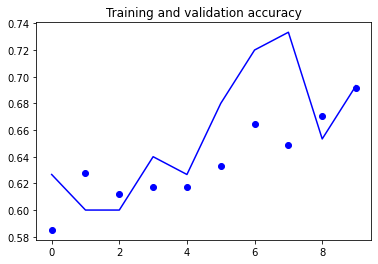

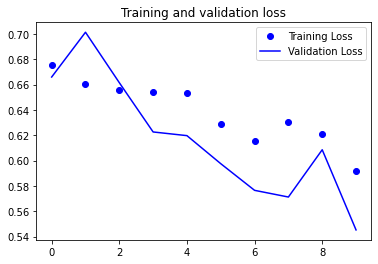

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()